# Group 5
## Data Wrangling Final Project<br>Social Determinants of Health

__Team Members__<br>
Jonathan Himes jonathan.himes@utah.edu U1367169 <br>
Michelle Kubicki michelle.kubicki@utah.edu U1370752<br> 
Yueqin Yang yueqin.yang@hsc.utah.edu U0737683<br> 
Jackie Bearnson u0763123@umail.utah.edu U0763123 <br>
Lucia Ranallo U1427138@umail.utah.edu U1427138 <br>
___
<a id='toc'></a>
### Table of Contents
* [Table of Contents](#toc)
* [Necessary Packages](#load_pack)
* [Project Description](#proj_description)
* [2018 Dataset Creation](#data_prep_2018)
* [2019 Dataset Creation](#data_prep_2019)
* [Data Exporation](#data_exp)
* [Data Comparison](#data_comp)



___
<a id='load_pack'></a>
### Necessary Packages

In [56]:
# Import required packages
import pandas as pd
import numpy as np
from operator import truediv
import matplotlib.pyplot as plt

___
<a id='proj_description'></a>
### Project Description

Someone explain SDOH


The following is a summary of the SDOH variables chosen and whether they were available for both 2018 and 2019.

In [38]:
summary = pd.read_csv('Data/SDOH_summary.csv')
summary

,Item,Description,Source,2018 Availability,2019 Availability
0,FIPS,US Census 11 digit FIPS code for tract,US Census,YES,YES
1,Urban,Urban/Rural Flag,USDA Food Access Research Atlas,NaN,NaN
2,Total_population,Total Population,ACS 2015 Estimates,YES,YES
3,P_WH,% White,ACS 2015 Estimates,YES,YES
4,P_AA,% African-American,ACS 2015 Estimates,YES,YES
5,P_AI,% American Indian,ACS 2015 Estimates,YES,YES
6,P_AS,% Asian,ACS 2015 Estimates,YES,YES
7,P_NH,% Native Hawaiian/Pacific Islander,ACS 2015 Estimates,YES,YES
8,P_OR,% Other Race,ACS 2015 Estimates,YES,YES
9,P_2R,% 2 or more Races,ACS 2015 Estimates,YES,YES


___
<a id='data_prep_2018'></a>
### 2018 Dataset Creation

In [ ]:
# Read in data
race_df = pd.read_csv('Data/C02003_Detailed Race--Data.csv',skiprows=[1])
latino_df = pd.read_csv('Data/B03002-Hispanic-Data.csv',skiprows=[1])
native_df = pd.read_csv('Data/B99051-Native-Data.csv',index_col=0)
citizen_df = pd.read_csv('Data/B05002-Citizenship-Data.csv',index_col=0)
education_df = pd.read_csv('Data/S1501-Education-Data.csv',index_col=0)
english_df = pd.read_csv('Data/C16001-Language-Data.csv',index_col=0)
HH_df = pd.read_csv('Data/S1901-HHIncome-Data.csv',index_col=0)
unemployment_df = pd.read_csv('Data/S2301-Unemployment-Data.csv',index_col=0)
insured_df = pd.read_csv('Data/S2701-Insurance-Data.csv',index_col=0)
private_insurance_df = pd.read_csv('Data/S2703-Private_Insurance-Data.csv',index_col=0)
public_insurance_df = pd.read_csv('Data/S2704-Public_Insurance-Data.csv',index_col=0)
EPA_HI_df = pd.read_excel(r'Data/2018_National_AllHI_by_tract.xlsx')
data = pd.read_csv("Data/WalkingData.csv")
# NOTE: No Food Access Research Atlas Data for 2018

In [4]:
# Create Facets Df
df = pd.DataFrame()

In [5]:
# Populate Facets DF
df['FIPS'] = race_df['GEO_ID'].str[-11:] # Add FIPS Column
#df['Urban'] = # Add FIPS Column
df['Total_population'] = race_df['C02003_001E'] # Add Total Population Column
df['P_WH'] = race_df['C02003_003E']/race_df['C02003_001E'] # Add % White Column
df['P_AA'] = race_df['C02003_004E']/race_df['C02003_001E'] # Add % African-American Column
df['P_AI'] = race_df['C02003_005E']/race_df['C02003_001E'] # Add % American Indian Column
df['P_AS'] = race_df['C02003_006E']/race_df['C02003_001E'] # Add % Asian Column
df['P_NH'] = race_df['C02003_007E']/race_df['C02003_001E'] # Add % Native Hawaiian/Pacific Islander Column
df['P_OR'] = race_df['C02003_008E']/race_df['C02003_001E'] # Add % Other Race Column
df['P_2R'] = race_df['C02003_009E']/race_df['C02003_001E']# Add % 2 or more Races Column
df['P_Latino'] = latino_df['B03002_012E']/race_df['C02003_001E'] # Add % Latino/Hispanic Ethnicity Column

In [6]:
# Ensure Fips are Sorted
df = df.sort_values(by='FIPS')

In [7]:
#Calculate the native born population
nb_list = []
for i in native_df.iloc[1].values:
    if isinstance(i, str):
        nb_list.append(int(i.replace(',',"")))
    else: nb_list.append(i)

# Calculate the foreign born population
fb_list = []
for i in native_df.iloc[4].values:
    if isinstance(i, str):
        fb_list.append(int(i.replace(',',"")))
    else: fb_list.append(i)
    
# Calculate the non citizens for each tract
nc_list = []
for i in citizen_df[citizen_df.columns[0::2]].iloc[20].tolist():
    if isinstance(i, str):
        nc_list.append(int(i.replace(',',"")))
    else: nc_list.append(i)
    
citizens_list = [sum(x) for x in zip(nb_list, fb_list)]
citizens_plus_noncitizens = [sum(x) for x in zip(nb_list, fb_list, nc_list)]


df['P_native'] = nb_list/race_df['C02003_001E'] # Add % Native Born Column
df['P_FB'] = fb_list/race_df['C02003_001E'] # Add % Foreign Born Column
df['P_citizen'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(citizens_list, citizens_plus_noncitizens)] # Add % Citizen Column
df['P_non-citizen'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(nc_list, citizens_plus_noncitizens)] # Add % Non Citizen Column

In [8]:
# Calculate no education less than equal 24
ne_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[2].values:
    if isinstance(i, str):
        ne_24_list.append(int(i.replace(',',"")))
    else: ne_24_list.append(i)
    
# Calculate no education greater than equal 25
ne_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[7].values:
    if isinstance(i, str):
        ne_25_list.append(int(i.replace(',',"")))
    else: ne_25_list.append(i)
    
# Calculate total less than equal 24
t_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[1].values:
    if isinstance(i, str):
        t_24_list.append(int(i.replace(',',"")))
    else: t_24_list.append(i)
    
# Calculate total greater than equal 25
t_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[6].values:
    if isinstance(i, str):
        t_25_list.append(int(i.replace(',',"")))
    else: t_25_list.append(i)
    
# Calculate total no education
total_no_education = [sum(x) for x in zip(ne_24_list, ne_25_list)]

# Calculate total population
total_population = [sum(x) for x in zip(t_24_list, t_25_list)]

# Calculate went to highscool no degree
hs_nd_list = []
for i in education_df[education_df.columns[0::12]].iloc[8].values:
    if isinstance(i, str):
        hs_nd_list.append(int(i.replace(',',"")))
    else: hs_nd_list.append(i)
    
# Calculate Completed highschool under 24
hs_c_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[3].values:
    if isinstance(i, str):
        hs_c_24_list.append(int(i.replace(',',"")))
    else: hs_c_24_list.append(i)
    
# Calculate Completed highschool over 25
hs_c_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[9].values:
    if isinstance(i, str):
        hs_c_25_list.append(int(i.replace(',',"")))
    else: hs_c_25_list.append(i)

# Caluclate total completed hs with degree
highschool_degree = [sum(x) for x in zip(hs_c_24_list, hs_c_25_list)]

# Calculate Completed highschool over 25
hs_c_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[9].values:
    if isinstance(i, str):
        hs_c_25_list.append(int(i.replace(',',"")))
    else: hs_c_25_list.append(i)
    
# Calculate some college under 24
sc_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[4].values:
    if isinstance(i, str):
        sc_24_list.append(int(i.replace(',',"")))
    else: sc_24_list.append(i)
    
# Calculate some college over 25
sc_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[10].values:
    if isinstance(i, str):
        sc_25_list.append(int(i.replace(',',"")))
    else: sc_25_list.append(i)
    
# Calculate total some college
total_some_college = [sum(x) for x in zip(sc_24_list, sc_25_list)]

# Calculate college degree under 24
cd_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[5].values:
    if isinstance(i, str):
        cd_24_list.append(int(i.replace(',',"")))
    else: cd_24_list.append(i)
    
# Calculate associate degree
ad_list = []
for i in education_df[education_df.columns[0::12]].iloc[11].values:
    if isinstance(i, str):
        ad_list.append(int(i.replace(',',"")))
    else: ad_list.append(i)
    
# Calculate bachelors degree
bd_list = []
for i in education_df[education_df.columns[0::12]].iloc[12].values:
    if isinstance(i, str):
        bd_list.append(int(i.replace(',',"")))
    else: bd_list.append(i)
    
# Calculate total college degree
total_college_degree = [sum(x) for x in zip(cd_24_list, ad_list, bd_list)]

# Calculate graduate degree
gd_list = []
for i in education_df[education_df.columns[0::12]].iloc[13].values:
    if isinstance(i, str):
        gd_list.append(int(i.replace(',',"")))
    else: gd_list.append(i)
    
df['P_NoSchool'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_no_education, total_population)] # Add % No schooling Column
df['P_HS_no_degree'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(hs_nd_list, total_population)] # Add % completed high school, no degree Column
df['P_HS_or_GED'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(highschool_degree, total_population)] # Add % High school or GED degree Column
df['P_some_college'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_some_college, total_population)] # Add % some college, no degree Column
df['P_college_degree'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_college_degree, total_population)] # Add % AA or BA Column
df['P_Masters_prof_doc'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(gd_list, total_population)] # Add % Masters, professional, doctorate Column

In [9]:
# Calculate the Percent limited english
english_df_reduced = english_df[english_df.columns[0::2]].applymap(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x)
total_speakers = english_df_reduced.loc["Total:"].tolist()
english_df_reduced_2 = english_df_reduced.iloc[[3,7,10,13,16,19,22,25,28,31,34,37]]
less_than_well_speakers = english_df_reduced_2.sum().values.tolist() 
df['P_limited_eng'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(less_than_well_speakers, total_speakers)] # Add % Limited English proficiency Column

In [10]:
# Calculate the Poverty Rate
poverty = unemployment_df[unemployment_df.columns[0::8]].iloc[31].map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x).tolist()
no_poverty = unemployment_df[unemployment_df.columns[0::8]].iloc[32].map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x).tolist()
total_pop = [sum(x) for x in zip(no_poverty, poverty)]
df['Poverty_rate'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(poverty, total_pop)]

In [11]:
# Calculate the Percent limited english
df['MED_HH_income'] = HH_df[HH_df.columns[0::8]].iloc[11].values.tolist()
df['MED_HH_income'] = df['MED_HH_income'].replace('-',np.nan).map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x)

In [12]:
# Calculate Unemployment rate
df['UE_rate'] = unemployment_df[unemployment_df.columns[6::8]].iloc[0].values.tolist()
df['UE_rate'] = df['UE_rate'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [13]:
# Calculate Uninsured
df['P_UI'] = insured_df[insured_df.columns[8::10]].iloc[0].values.tolist()
df['P_UI'] = df['P_UI'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Insured
df['P_Insured'] = insured_df[insured_df.columns[4::10]].iloc[0].values.tolist()
df['P_Insured'] = df['P_Insured'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured under 18
df['P_UI_under_18'] = insured_df[insured_df.columns[8::10]].iloc[11].values.tolist()
df['P_UI_under_18'] = df['P_UI_under_18'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured  19-64
df['P_UI_18-64'] = insured_df[insured_df.columns[8::10]].iloc[12].values.tolist()
df['P_UI_18-64'] = df['P_UI_18-64'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured  over 64
df['P_UI_65_over'] = insured_df[insured_df.columns[8::10]].iloc[13].values.tolist()
df['P_UI_65_over'] = df['P_UI_65_over'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [14]:
# Calculate Private insurance percentage
df['P_any_private_ins'] = private_insurance_df[private_insurance_df.columns[4::6]].iloc[0].values.tolist()
df['P_any_private_ins'] = df['P_any_private_ins'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [15]:
# Calculate Public insurance percentage
df['P_any_public_ins'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[0].values.tolist()
df['P_any_public_ins'] = df['P_any_public_ins'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Medicare Alone percentage
df['P_Medicare_alone'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[2].values.tolist()
df['P_Medicare_alone'] = df['P_Medicare_alone'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Medicaid Alone percentage
df['P_Medicaid_alone'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[6].values.tolist()
df['P_Medicaid_alone'] = df['P_Medicaid_alone'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

### Walkability

In [16]:
# Add in the Walkability information
data_2 = data[["STATEFP", "COUNTYFP", "TRACTCE", "NatWalkInd"]]
data_2['FIPS'] = data_2.iloc[:,0:3].apply(
    lambda x: ''.join(x.astype(str)),axis=1)

# Generate the FIPS Number from Columns
full_list = []

for i in range(data_2.shape[0]):
    statefp = str(data_2.iloc[i]['STATEFP'])
    if len(str(data_2.iloc[i]['COUNTYFP'])) == 1:
        countyfp = '00'+str(data_2.iloc[i]['COUNTYFP'])
    elif len(str(data_2.iloc[i]['COUNTYFP'])) == 2:
        countyfp = '0'+str(data_2.iloc[i]['COUNTYFP'])
    else:
        countyfp = str(data_2.iloc[i]['COUNTYFP'])
        
    if len(str(data_2.iloc[i]['TRACTCE'])) == 3:
        tractce = '000'+str(data_2.iloc[i]['TRACTCE'])
    elif len(str(data_2.iloc[i]['TRACTCE'])) == 4:
        tractce = '00'+str(data_2.iloc[i]['TRACTCE'])
    elif len(str(data_2.iloc[i]['TRACTCE'])) == 5:
        tractce = '0'+str(data_2.iloc[i]['TRACTCE'])
    else:
        tractce = str(data_2.iloc[i]['TRACTCE'])
        
    full_list.append(statefp + countyfp + tractce)
    
# Update the FIPS with full number
data_2['FIPS'] = full_list

# Average the walkability score by FIPS
data_2 = data_2.groupby(['FIPS'], as_index=False).mean()
# Ensure Fips are Sorted
data_2 = data_2.sort_values(by='FIPS')

# Add national walk index to data frame
df["NatWalkInd"] = list(data_2["NatWalkInd"])

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_20864\4030897994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['FIPS'] = data_2.iloc[:,0:3].apply(
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_20864\4030897994.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['FIPS'] = full_list


# Respiratory

In [19]:
# Clean up the data
EPA_HI_df['Tract'] = EPA_HI_df['Tract'].astype(str)
utah_df = EPA_HI_df[EPA_HI_df.Tract.isin(list(df['FIPS']))]
final_utah_HI_2018 = utah_df[['Tract','Respiratory HI']]

# Find missing data
missing_data = [x for x in list(df['FIPS']) if x not in list(utah_df['Tract'])]
missing_data

# Add missing data with nan as value
for i in missing_data:
    final_utah_HI_2018.loc[len(final_utah_HI_2018.index)] = [i,np.nan]
    
# Sort the data
# Ensure Fips are Sorted
final_utah_HI_2018 = final_utah_HI_2018.sort_values(by='Tract')

# add to dataframe
df['Respiratory HI'] = list(final_utah_HI_2018['Respiratory HI'])

    

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_20864\1777324478.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_utah_HI_2018.loc[len(final_utah_HI_2018.index)] = [i,np.nan]
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_20864\1777324478.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_utah_HI_2018.loc[len(final_utah_HI_2018.index)] = [i,np.nan]
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_20864\1777324478.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [20]:
df_2018 = df

In [21]:
df_2018

,FIPS,Total_population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,P_2R,P_Latino,...,P_Insured,P_UI_under_18,P_UI_18-64,P_UI_65_over,P_any_private_ins,P_any_public_ins,P_Medicare_alone,P_Medicaid_alone,NatWalkInd,Respiratory HI
0,49001100100,3322,0.973209,0.000000,0.015051,0.000000,0.000000,0.011740,0.000000,0.094521,...,0.890,0.068,0.176,0.000,0.739,0.271,0.184,0.109,8.000000,0.104816
1,49001100200,3121,0.944569,0.000000,0.003845,0.005127,0.000000,0.038449,0.008010,0.132970,...,0.868,0.178,0.132,0.000,0.787,0.199,0.134,0.071,7.055556,0.113938
2,49003960100,2989,0.977250,0.004349,0.002676,0.006357,0.000000,0.006691,0.002676,0.036467,...,0.906,0.106,0.114,0.000,0.777,0.222,0.163,0.068,3.777778,0.151966
3,49003960200,7947,0.966277,0.000881,0.010318,0.008305,0.001636,0.008179,0.004404,0.100793,...,0.951,0.041,0.064,0.000,0.818,0.230,0.116,0.115,4.750000,0.167178
4,49003960300,8810,0.874801,0.019864,0.000000,0.018388,0.000000,0.057548,0.029398,0.157435,...,0.927,0.034,0.115,0.022,0.752,0.229,0.094,0.148,8.638889,0.183555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,49057210900,7005,0.924197,0.018558,0.005996,0.000000,0.000000,0.005139,0.046110,0.117773,...,0.928,0.043,0.098,0.028,0.838,0.197,0.159,0.040,11.233333,0.237077
584,49057211000,3244,0.953144,0.009864,0.000000,0.016030,0.000000,0.000000,0.020962,0.149507,...,0.899,0.032,0.154,0.000,0.808,0.203,0.137,0.078,15.750000,0.251411
585,49057211100,5367,0.921558,0.001304,0.000000,0.003913,0.000000,0.002422,0.070803,0.058506,...,0.932,0.053,0.095,0.000,0.772,0.316,0.180,0.156,12.700000,0.249107
586,49057211201,4820,0.940664,0.008714,0.000000,0.007469,0.001660,0.024274,0.017220,0.076763,...,0.884,0.100,0.150,0.000,0.790,0.197,0.153,0.067,8.333333,0.218624


___
<a id='data_prep_2019'></a>
### 2019 Dataset Creation

In [22]:
# Read in data
race_df = pd.read_csv('Data-2019/C02003_Detailed Race--Data.csv',skiprows=[1])
latino_df = pd.read_csv('Data-2019/B03002-Hispanic-Data.csv',skiprows=[1])
native_df = pd.read_csv('Data-2019/B99051-Native-Data.csv',index_col=0)
citizen_df = pd.read_csv('Data-2019/B05002-Citizenship-Data.csv',index_col=0)
education_df = pd.read_csv('Data-2019/S1501-Education-Data.csv',index_col=0)
english_df = pd.read_csv('Data-2019/C16001-Language-Data.csv',index_col=0)
HH_df = pd.read_csv('Data-2019/S1901-HHIncome-Data.csv',index_col=0)
unemployment_df = pd.read_csv('Data-2019/S2301-Unemployment-Data.csv',index_col=0)
insured_df = pd.read_csv('Data-2019/S2701-Insurance-Data.csv',index_col=0)
private_insurance_df = pd.read_csv('Data-2019/S2703-Private_Insurance-Data.csv',index_col=0)
public_insurance_df = pd.read_csv('Data-2019/S2704-Public_Insurance-Data.csv',index_col=0)

In [23]:
# Read in Food Atlas Data
#The data was downloaded from https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/
#The excel file is 84mb, too large to open
#Read excel file FoodAccessResearchAtlasData2019, to see how many spreadsheet in that file
data_FARA = pd.read_csv('Data-2019/utah_FoodAccessResearchAtlasData2019.csv')
variablelookup_data = pd.read_csv('Data-2019/variablelookup_data.csv')

In [24]:
# Create Facets Df
df = pd.DataFrame()

In [25]:
# Populate Facets DF
df['FIPS'] = race_df['GEO_ID'].str[-11:] # Add FIPS Column
#df['Urban'] = # Add FIPS Column
df['Total_population'] = race_df['C02003_001E'] # Add Total Population Column
df['P_WH'] = race_df['C02003_003E']/race_df['C02003_001E'] # Add % White Column
df['P_AA'] = race_df['C02003_004E']/race_df['C02003_001E'] # Add % African-American Column
df['P_AI'] = race_df['C02003_005E']/race_df['C02003_001E'] # Add % American Indian Column
df['P_AS'] = race_df['C02003_006E']/race_df['C02003_001E'] # Add % Asian Column
df['P_NH'] = race_df['C02003_007E']/race_df['C02003_001E'] # Add % Native Hawaiian/Pacific Islander Column
df['P_OR'] = race_df['C02003_008E']/race_df['C02003_001E'] # Add % Other Race Column
df['P_2R'] = race_df['C02003_009E']/race_df['C02003_001E']# Add % 2 or more Races Column
df['P_Latino'] = latino_df['B03002_012E']/race_df['C02003_001E'] # Add % Latino/Hispanic Ethnicity Column

In [26]:
#Calculate the native born population
nb_list = []
for i in native_df.iloc[1].values:
    if isinstance(i, str):
        nb_list.append(int(i.replace(',',"")))
    else: nb_list.append(i)

# Calculate the foreign born population
fb_list = []
for i in native_df.iloc[4].values:
    if isinstance(i, str):
        fb_list.append(int(i.replace(',',"")))
    else: fb_list.append(i)
    
# Calculate the non citizens for each tract
nc_list = []
for i in citizen_df[citizen_df.columns[0::2]].iloc[20].tolist():
    if isinstance(i, str):
        nc_list.append(int(i.replace(',',"")))
    else: nc_list.append(i)
    
citizens_list = [sum(x) for x in zip(nb_list, fb_list)]
citizens_plus_noncitizens = [sum(x) for x in zip(nb_list, fb_list, nc_list)]


df['P_native'] = nb_list/race_df['C02003_001E'] # Add % Native Born Column
df['P_FB'] = fb_list/race_df['C02003_001E'] # Add % Foreign Born Column
df['P_citizen'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(citizens_list, citizens_plus_noncitizens)] # Add % Citizen Column
df['P_non-citizen'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(nc_list, citizens_plus_noncitizens)] # Add % Non Citizen Column

In [27]:
# Calculate no education less than equal 24
ne_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[2].values:
    if isinstance(i, str):
        ne_24_list.append(int(i.replace(',',"")))
    else: ne_24_list.append(i)
    
# Calculate no education greater than equal 25
ne_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[7].values:
    if isinstance(i, str):
        ne_25_list.append(int(i.replace(',',"")))
    else: ne_25_list.append(i)
    
# Calculate total less than equal 24
t_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[1].values:
    if isinstance(i, str):
        t_24_list.append(int(i.replace(',',"")))
    else: t_24_list.append(i)
    
# Calculate total greater than equal 25
t_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[6].values:
    if isinstance(i, str):
        t_25_list.append(int(i.replace(',',"")))
    else: t_25_list.append(i)
    
# Calculate total no education
total_no_education = [sum(x) for x in zip(ne_24_list, ne_25_list)]

# Calculate total population
total_population = [sum(x) for x in zip(t_24_list, t_25_list)]

# Calculate went to highscool no degree
hs_nd_list = []
for i in education_df[education_df.columns[0::12]].iloc[8].values:
    if isinstance(i, str):
        hs_nd_list.append(int(i.replace(',',"")))
    else: hs_nd_list.append(i)
    
# Calculate Completed highschool under 24
hs_c_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[3].values:
    if isinstance(i, str):
        hs_c_24_list.append(int(i.replace(',',"")))
    else: hs_c_24_list.append(i)
    
# Calculate Completed highschool over 25
hs_c_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[9].values:
    if isinstance(i, str):
        hs_c_25_list.append(int(i.replace(',',"")))
    else: hs_c_25_list.append(i)

# Caluclate total completed hs with degree
highschool_degree = [sum(x) for x in zip(hs_c_24_list, hs_c_25_list)]

# Calculate Completed highschool over 25
hs_c_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[9].values:
    if isinstance(i, str):
        hs_c_25_list.append(int(i.replace(',',"")))
    else: hs_c_25_list.append(i)
    
# Calculate some college under 24
sc_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[4].values:
    if isinstance(i, str):
        sc_24_list.append(int(i.replace(',',"")))
    else: sc_24_list.append(i)
    
# Calculate some college over 25
sc_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[10].values:
    if isinstance(i, str):
        sc_25_list.append(int(i.replace(',',"")))
    else: sc_25_list.append(i)
    
# Calculate total some college
total_some_college = [sum(x) for x in zip(sc_24_list, sc_25_list)]

# Calculate college degree under 24
cd_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[5].values:
    if isinstance(i, str):
        cd_24_list.append(int(i.replace(',',"")))
    else: cd_24_list.append(i)
    
# Calculate associate degree
ad_list = []
for i in education_df[education_df.columns[0::12]].iloc[11].values:
    if isinstance(i, str):
        ad_list.append(int(i.replace(',',"")))
    else: ad_list.append(i)
    
# Calculate bachelors degree
bd_list = []
for i in education_df[education_df.columns[0::12]].iloc[12].values:
    if isinstance(i, str):
        bd_list.append(int(i.replace(',',"")))
    else: bd_list.append(i)
    
# Calculate total college degree
total_college_degree = [sum(x) for x in zip(cd_24_list, ad_list, bd_list)]

# Calculate graduate degree
gd_list = []
for i in education_df[education_df.columns[0::12]].iloc[13].values:
    if isinstance(i, str):
        gd_list.append(int(i.replace(',',"")))
    else: gd_list.append(i)
    
df['P_NoSchool'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_no_education, total_population)] # Add % No schooling Column
df['P_HS_no_degree'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(hs_nd_list, total_population)] # Add % completed high school, no degree Column
df['P_HS_or_GED'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(highschool_degree, total_population)] # Add % High school or GED degree Column
df['P_some_college'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_some_college, total_population)] # Add % some college, no degree Column
df['P_college_degree'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_college_degree, total_population)] # Add % AA or BA Column
df['P_Masters_prof_doc'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(gd_list, total_population)] # Add % Masters, professional, doctorate Column

In [28]:
# Calculate the Percent limited english
english_df_reduced = english_df[english_df.columns[0::2]].applymap(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x)
total_speakers = english_df_reduced.loc["Total:"].tolist()
english_df_reduced_2 = english_df_reduced.iloc[[3,7,10,13,16,19,22,25,28,31,34,37]]
less_than_well_speakers = english_df_reduced_2.sum().values.tolist() 
df['P_limited_eng'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(less_than_well_speakers, total_speakers)] # Add % Limited English proficiency Column

In [29]:
# Calculate the Poverty Rate
poverty = unemployment_df[unemployment_df.columns[0::8]].iloc[31].map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x).tolist()
no_poverty = unemployment_df[unemployment_df.columns[0::8]].iloc[32].map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x).tolist()
total_pop = [sum(x) for x in zip(no_poverty, poverty)]
df['Poverty_rate'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(poverty, total_pop)]

In [30]:
# Calculate the Percent limited english
df['MED_HH_income'] = HH_df[HH_df.columns[0::8]].iloc[11].values.tolist()
df['MED_HH_income'] = df['MED_HH_income'].replace('-',np.nan).map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x)

In [31]:
# Calculate Unemployment rate
df['UE_rate'] = unemployment_df[unemployment_df.columns[6::8]].iloc[0].values.tolist()
df['UE_rate'] = df['UE_rate'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [32]:
# Calculate Uninsured
df['P_UI'] = insured_df[insured_df.columns[8::10]].iloc[0].values.tolist()
df['P_UI'] = df['P_UI'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Insured
df['P_Insured'] = insured_df[insured_df.columns[4::10]].iloc[0].values.tolist()
df['P_Insured'] = df['P_Insured'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured under 18
df['P_UI_under_18'] = insured_df[insured_df.columns[8::10]].iloc[11].values.tolist()
df['P_UI_under_18'] = df['P_UI_under_18'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured  19-64
df['P_UI_18-64'] = insured_df[insured_df.columns[8::10]].iloc[12].values.tolist()
df['P_UI_18-64'] = df['P_UI_18-64'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured  over 64
df['P_UI_65_over'] = insured_df[insured_df.columns[8::10]].iloc[13].values.tolist()
df['P_UI_65_over'] = df['P_UI_65_over'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [33]:
# Calculate Private insurance percentage
df['P_any_private_ins'] = private_insurance_df[private_insurance_df.columns[4::6]].iloc[0].values.tolist()
df['P_any_private_ins'] = df['P_any_private_ins'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [34]:
# Calculate Public insurance percentage
df['P_any_public_ins'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[0].values.tolist()
df['P_any_public_ins'] = df['P_any_public_ins'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Medicare Alone percentage
df['P_Medicare_alone'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[2].values.tolist()
df['P_Medicare_alone'] = df['P_Medicare_alone'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Medicaid Alone percentage
df['P_Medicaid_alone'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[6].values.tolist()
df['P_Medicaid_alone'] = df['P_Medicaid_alone'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [35]:
df_2019 = df

In [36]:
df_2019

,FIPS,Total_population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,P_2R,P_Latino,...,UE_rate,P_UI,P_Insured,P_UI_under_18,P_UI_18-64,P_UI_65_over,P_any_private_ins,P_any_public_ins,P_Medicare_alone,P_Medicaid_alone
0,49001100100,3319,0.975595,0.000000,0.013558,0.000000,0.000000,0.010847,0.000000,0.100633,...,0.011,0.117,0.883,0.096,0.175,0.000,0.724,0.279,0.192,0.104
1,49001100200,3198,0.895872,0.000000,0.005629,0.005941,0.000000,0.039712,0.052846,0.139462,...,0.056,0.137,0.863,0.154,0.152,0.000,0.761,0.191,0.117,0.084
2,49003960100,3265,0.958346,0.008576,0.002757,0.004288,0.000000,0.004594,0.021440,0.022665,...,0.019,0.064,0.936,0.066,0.080,0.000,0.809,0.224,0.146,0.081
3,49003960200,7929,0.974524,0.001387,0.005423,0.003405,0.002018,0.008954,0.004288,0.087275,...,0.050,0.062,0.938,0.037,0.089,0.000,0.807,0.233,0.114,0.119
4,49003960300,8960,0.908371,0.022321,0.000223,0.010379,0.000000,0.031027,0.027679,0.134152,...,0.037,0.079,0.921,0.034,0.124,0.022,0.751,0.230,0.106,0.141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,49057210900,7172,0.911601,0.017987,0.011433,0.008645,0.000000,0.005438,0.044897,0.131344,...,0.021,0.078,0.922,0.039,0.114,0.016,0.806,0.212,0.164,0.060
584,49057211000,3291,0.956244,0.007596,0.000000,0.000000,0.013370,0.003342,0.019447,0.161957,...,0.075,0.087,0.913,0.027,0.131,0.000,0.826,0.210,0.143,0.081
585,49057211100,5526,0.933225,0.002714,0.000000,0.003438,0.000000,0.009410,0.051212,0.078357,...,0.044,0.048,0.952,0.048,0.063,0.000,0.802,0.280,0.174,0.123
586,49057211201,4600,0.924783,0.006087,0.000000,0.011087,0.005000,0.028696,0.024348,0.099130,...,0.032,0.154,0.846,0.174,0.180,0.000,0.742,0.209,0.154,0.075


___
<a id='data_exp'></a>
### 2018 Data Exploration

In [40]:
# Display the descriptive statistics for the first 10 column of the dataset
display(df_2018.describe().iloc[:,:10])

,Total_population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,P_2R,P_Latino,P_native
count,588.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,5179.166667,0.865704,0.011943,0.012207,0.022663,0.008736,0.050093,0.028655,0.138618,0.914214
std,2701.694858,0.128634,0.019437,0.059044,0.027812,0.016953,0.080128,0.019361,0.119862,0.071184
min,0.000000,0.007433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583544
25%,3606.750000,0.841786,0.000881,0.000000,0.004856,0.000000,0.005932,0.014563,0.053757,0.890412
50%,4624.000000,0.906468,0.005524,0.002970,0.014246,0.001747,0.018795,0.025485,0.103464,0.934677
75%,6309.250000,0.943858,0.014363,0.010036,0.031751,0.010349,0.057365,0.039258,0.174059,0.962963
max,29636.000000,1.000000,0.156725,0.956674,0.219237,0.135329,0.460949,0.118982,0.649310,1.000000


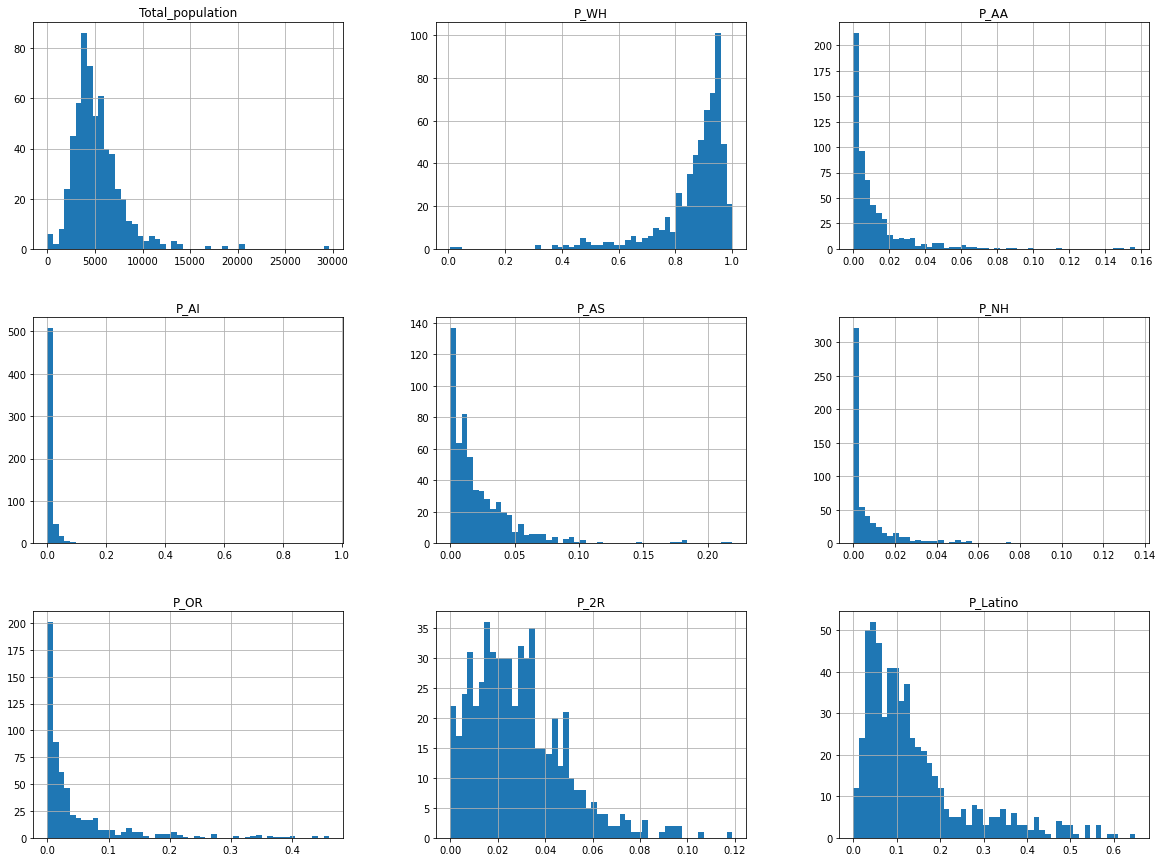

In [57]:
df_2018.iloc[:,:10].hist(bins = 50, figsize = (20, 15)) # Display histograms for the first 20 columns of the combined dataset
plt.show()

In [45]:
# Display the descriptive statistics for the 2nd 10 columns of the dataset
display(df_2018.describe().iloc[:,10:20])

,P_FB,P_citizen,P_non-citizen,P_NoSchool,P_HS_no_degree,P_HS_or_GED,P_some_college,P_college_degree,P_Masters_prof_doc,P_limited_eng
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,0.085786,0.951838,0.048162,0.043501,0.046101,0.242013,0.297617,0.274484,0.096284,0.082586
std,0.071184,0.045217,0.045217,0.037399,0.041607,0.092118,0.080091,0.086630,0.070318,0.066283
min,0.000000,0.755556,0.000000,0.000000,0.000000,0.028889,0.037383,0.000000,0.000000,0.000000
25%,0.037037,0.934480,0.015818,0.019067,0.017262,0.169756,0.255993,0.208964,0.043578,0.036194
50%,0.065323,0.966750,0.033250,0.033578,0.036474,0.240109,0.290679,0.275069,0.077939,0.064792
75%,0.109588,0.984182,0.065520,0.054282,0.064200,0.314364,0.328125,0.340378,0.130108,0.106734
max,0.416456,1.000000,0.244444,0.263629,0.523364,0.484282,0.879800,0.492138,0.409076,0.390323


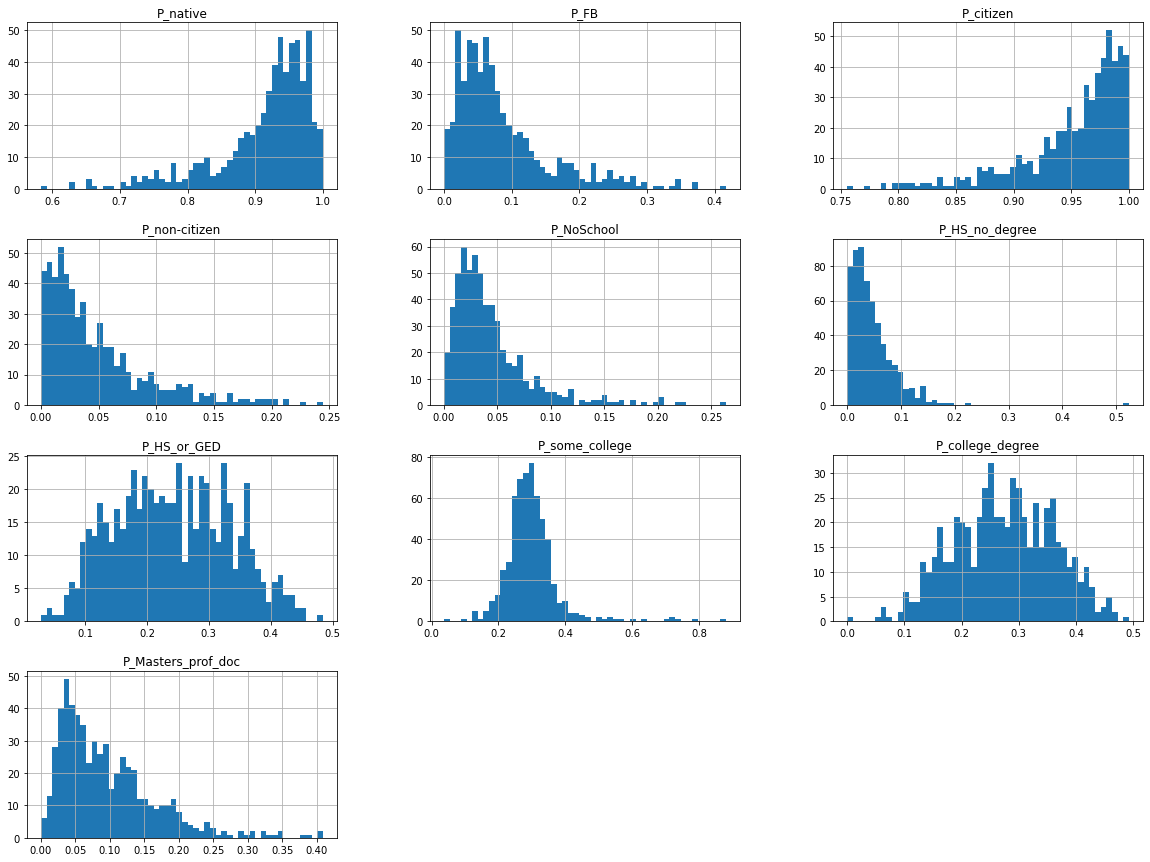

In [59]:
df_2018.iloc[:,10:20].hist(bins = 50, figsize = (20, 15)) # Display histograms for the first 20 columns of the combined dataset
plt.show()

In [46]:
# Display the descriptive statistics for the 3rd 10 columns of the dataset
display(df_2018.describe().iloc[:,20:30])

,Poverty_rate,MED_HH_income,UE_rate,P_UI,P_Insured,P_UI_under_18,P_UI_18-64,P_UI_65_over,P_any_private_ins,P_any_public_ins
count,584.000000,584.000000,584.000000,584.000000,584.000000,583.000000,584.000000,582.000000,584.000000,584.000000
mean,0.104697,71435.868151,0.040070,0.103089,0.896911,0.078302,0.133683,0.012139,0.770139,0.219002
std,0.095222,25482.723491,0.024768,0.069795,0.069795,0.073348,0.087881,0.033115,0.123197,0.081450
min,0.000000,20085.000000,0.000000,0.002000,0.600000,0.000000,0.002000,0.000000,0.228000,0.019000
25%,0.041136,53100.750000,0.024000,0.051000,0.860750,0.028000,0.068750,0.000000,0.700500,0.163000
50%,0.079363,67052.000000,0.036000,0.085500,0.914500,0.058000,0.115000,0.000000,0.797000,0.211000
75%,0.130164,86953.250000,0.051000,0.139250,0.949000,0.108000,0.176000,0.000750,0.862250,0.266000
max,0.793033,203194.000000,0.233000,0.400000,0.998000,0.690000,0.595000,0.339000,0.983000,0.521000


In [47]:
# Display the descriptive statistics for the 2nd 10 columns of the dataset
display(df_2018.describe().iloc[:,30:40])

,P_Medicare_alone,P_Medicaid_alone,NatWalkInd,Respiratory HI
count,584.000000,584.000000,588.000000,585.000000
mean,0.120113,0.110594,10.950274,0.267683
std,0.057119,0.067545,3.635430,0.086927
min,0.002000,0.006000,1.000000,0.092095
25%,0.080750,0.060750,7.833333,0.213989
50%,0.115000,0.098000,11.333333,0.267552
75%,0.154000,0.147000,13.958333,0.319366
max,0.451000,0.426000,19.000000,0.745067


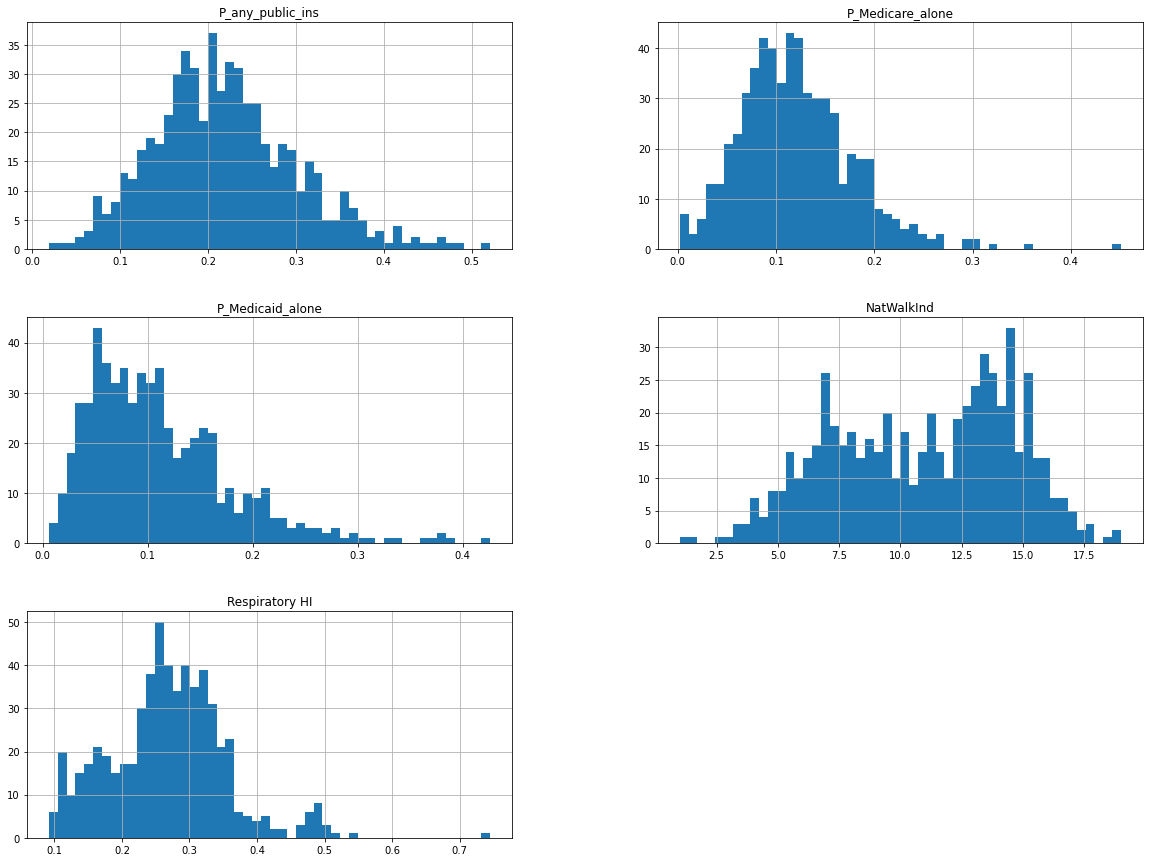

In [ ]:
df_2018.iloc[:,30:40].hist(bins = 50, figsize = (20, 15)) # Display histograms for the first 20 columns of the combined dataset
plt.show()

__Interpretation:__ 

___
<a id='data_comp'></a>
### Data Comparison